### Importing libraries

In [1]:
# Numerical python library
import numpy as np
# Python DataFrame library
import pandas as pd
# Python Visualisation library
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
#Train dataset
train = pd.read_csv('train.csv', index_col = 'id')
#Test dataset
test = pd.read_csv('test.csv', index_col = 'id') 
#Sample Submission dataset
sample_sub = pd.read_csv('sample_submission.csv')##Sample Submission dataset

### Exploring the Dataset

In [3]:
train.head(3)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
id,,,,,,,,,,,,,,
0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0


#### Dataset Shape

In [4]:
print(f'Train shape : {train.shape}\nTest shape : {test.shape}')

Train shape : (40000, 14)
Test shape : (10000, 13)


The train dataset contains 40000 entries and 14 features, the target feature included. On the other hand, the test dataset contains 10000 entries and 13 features.

#### Dataset info

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  35899 non-null  float64
 1   acousticness      36008 non-null  float64
 2   danceability      35974 non-null  float64
 3   energy            36025 non-null  float64
 4   instrumentalness  36015 non-null  float64
 5   key               35935 non-null  float64
 6   liveness          35914 non-null  float64
 7   loudness          36043 non-null  float64
 8   audio_mode        40000 non-null  int64  
 9   speechiness       40000 non-null  float64
 10  tempo             40000 non-null  float64
 11  time_signature    40000 non-null  int64  
 12  audio_valence     40000 non-null  float64
 13  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 4.6 MB


The above information shows that 11 features of the dataset are of type floats, with the other 3 being an integer. It also shows that 8 columns of the dataset contains some missing values.

### Dataset columns/Features

In [6]:
train.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [7]:
test.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

In [8]:
target_col = [x for x in train.columns if x not in test.columns]
target_col

['song_popularity']

### Missing values

In [9]:
train_missing = (train.isnull().sum()[train.isnull().sum().gt(0)]/len(train) * 100).sort_values()
train_missing

loudness             9.8925
energy               9.9375
instrumentalness     9.9625
acousticness         9.9800
danceability        10.0650
key                 10.1625
liveness            10.2150
song_duration_ms    10.2525
dtype: float64

In [10]:
test_missing = (test.isnull().sum()[test.isnull().sum().gt(0)]/len(train) * 100).sort_values()
test_missing

acousticness        2.3750
song_duration_ms    2.3925
danceability        2.4400
key                 2.4800
instrumentalness    2.5000
liveness            2.5150
loudness            2.5650
energy              2.6375
dtype: float64

### Missing values plot

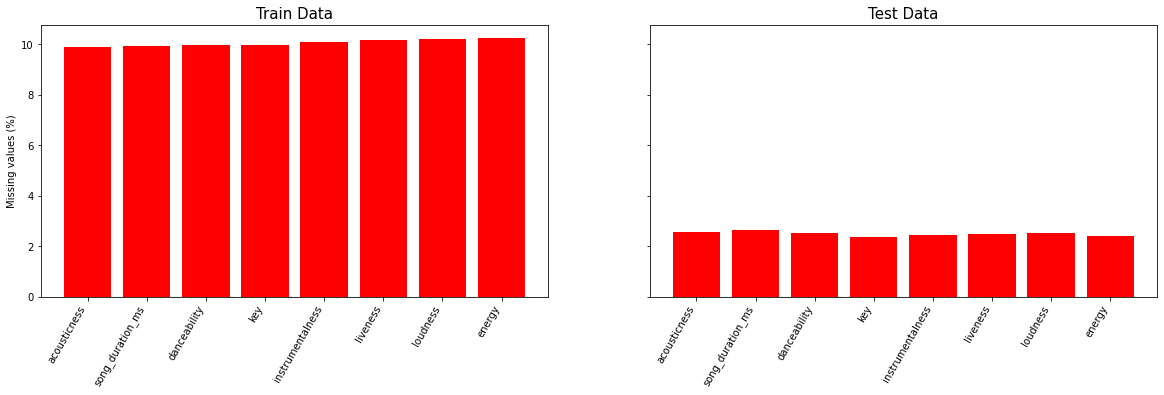

In [11]:
fig, [axes0, axes1] = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5),  sharex = True, sharey = True)
axes0.bar(x= train_missing.index, height= train_missing.values, color = 'red')
axes0.set_xticklabels(train_missing.index, rotation = 60, ha = 'right')
axes0.set_title('Train Data', fontsize = 15)

axes1.bar(x= test_missing.index, height= test_missing.values, color = 'red')
axes1.set_xticklabels(test_missing.index, rotation = 60, ha = 'right')
axes1.set_title('Test Data', fontsize = 15)

axes0.set_ylabel('Missing values (%)')
plt.show()

### Descriptive statistics

In [12]:
train.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,35899.000000,36008.000000,35974.000000,36025.000000,36015.000000,35935.000000,35914.000000,36043.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,193165.847572,0.276404,0.570951,0.683932,0.036527,5.042605,0.198514,-7.407596,0.321150,0.094107,116.562815,3.394375,0.580645,0.364400
std,45822.127679,0.297928,0.190010,0.212662,0.150024,3.372728,0.151670,3.877198,0.466924,0.083591,26.167911,0.524405,0.237351,0.481268
min,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-32.117911,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,166254.500000,0.039618,0.424760,0.539276,0.000941,2.000000,0.111796,-9.578139,0.000000,0.038500,96.995309,3.000000,0.398669,0.000000
50%,186660.000000,0.140532,0.608234,0.704453,0.001974,5.000000,0.135945,-6.345413,0.000000,0.055881,113.795959,3.000000,0.598827,0.000000
75%,215116.000000,0.482499,0.718464,0.870503,0.003225,8.000000,0.212842,-4.620711,1.000000,0.118842,128.517383,4.000000,0.759635,1.000000
max,491671.000000,1.065284,0.957131,1.039741,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,219.163578,5.000000,1.022558,1.000000


### Observation

**Acousticness**: The range of this feature is (-0.013551,1.065284). Whereas, the range of values according to research should be (0,1).

**Energy**: The range of this feature is (-0.001682,1.039741). Whereas, the range of values according to research should be (0,1).

**Instrumentalness**: The range of this feature is (-0.004398,1.075415). Whereas, the range of values according to research should be (0,1).

**Liveness**: The range of this feature is (0.027843 ,1.065298). Whereas, the range of values according to research should be (0,1).

**Loudness**: The range of this feature is (-32.117911 ,-0.877346). Whereas, the range of values according to research should be (0,1).

**Valence**: The range of this feature is (0.013398 ,1.022558). Whereas, the range of values according to research should be (0,1).

In [13]:
train.groupby('song_popularity').agg(['mean','std'])

song_duration_ms               acousticness            \
                            mean           std         mean       std   
song_popularity                                                         
0                  193303.321231  45936.814889     0.270688  0.291289   
1                  192926.389521  45622.433532     0.286342  0.308891   

                danceability              energy           instrumentalness  \
                        mean       std      mean       std             mean   
song_popularity                                                               
0                   0.568432  0.189945  0.692754  0.210922         0.037609   
1                   0.575376  0.190052  0.668628  0.214797         0.034646   

                           ... audio_mode           speechiness            \
                      std  ...       mean       std        mean       std   
song_popularity            ...                                              
0                0.152720  ...   0.321665  0.467124    0.092573  0.082464   
1                0.145207  ...   0.320252  0.466589    0.096781  0.085458   

                      tempo            time_signature           audio_valence  \
                       mean        std           mean       std          mean   
song_popularity                                                                 
0                116.796612  25.884407       3.400212  0.527229      0.588827   
1                116.155018  26.651180       3.384193  0.519303      0.566373   

                           
                      std  
song_popularity            
0                0.237515  
1                0.236396  

[2 rows x 26 columns]

### Observation

**1** Popular songs on an average tend to have a higher duration, danceability, key, liveness and speechiness compared to non popular ones.

**2** On the other hand, popular songs on an average tend to have a lower energy, instrmentalness, key, loudness audio mode,tempo time_signature and audio_valence compared to non popular ones.

#### End Note

The above analysis doesn't really show a tangible difference between a popular and unpopular songs

# Visualization Insights

## Univariate Plot

###### Target variables

In [14]:
train['song_popularity'].value_counts(normalize = True)

0    0.6356
1    0.3644
Name: song_popularity, dtype: float64

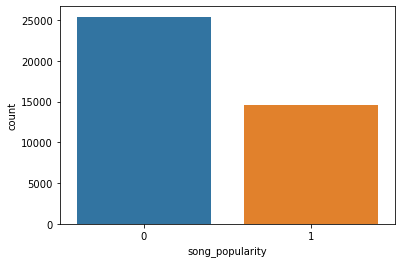

In [15]:
sns.countplot(train['song_popularity'])
plt.show()

**OBSERVATION** The plot above shows that the dataset is imbalance with the negative class taking up 64% of the dataset and the positive class taking the remaining 36%.

#### Numerical Features Distribution

[]

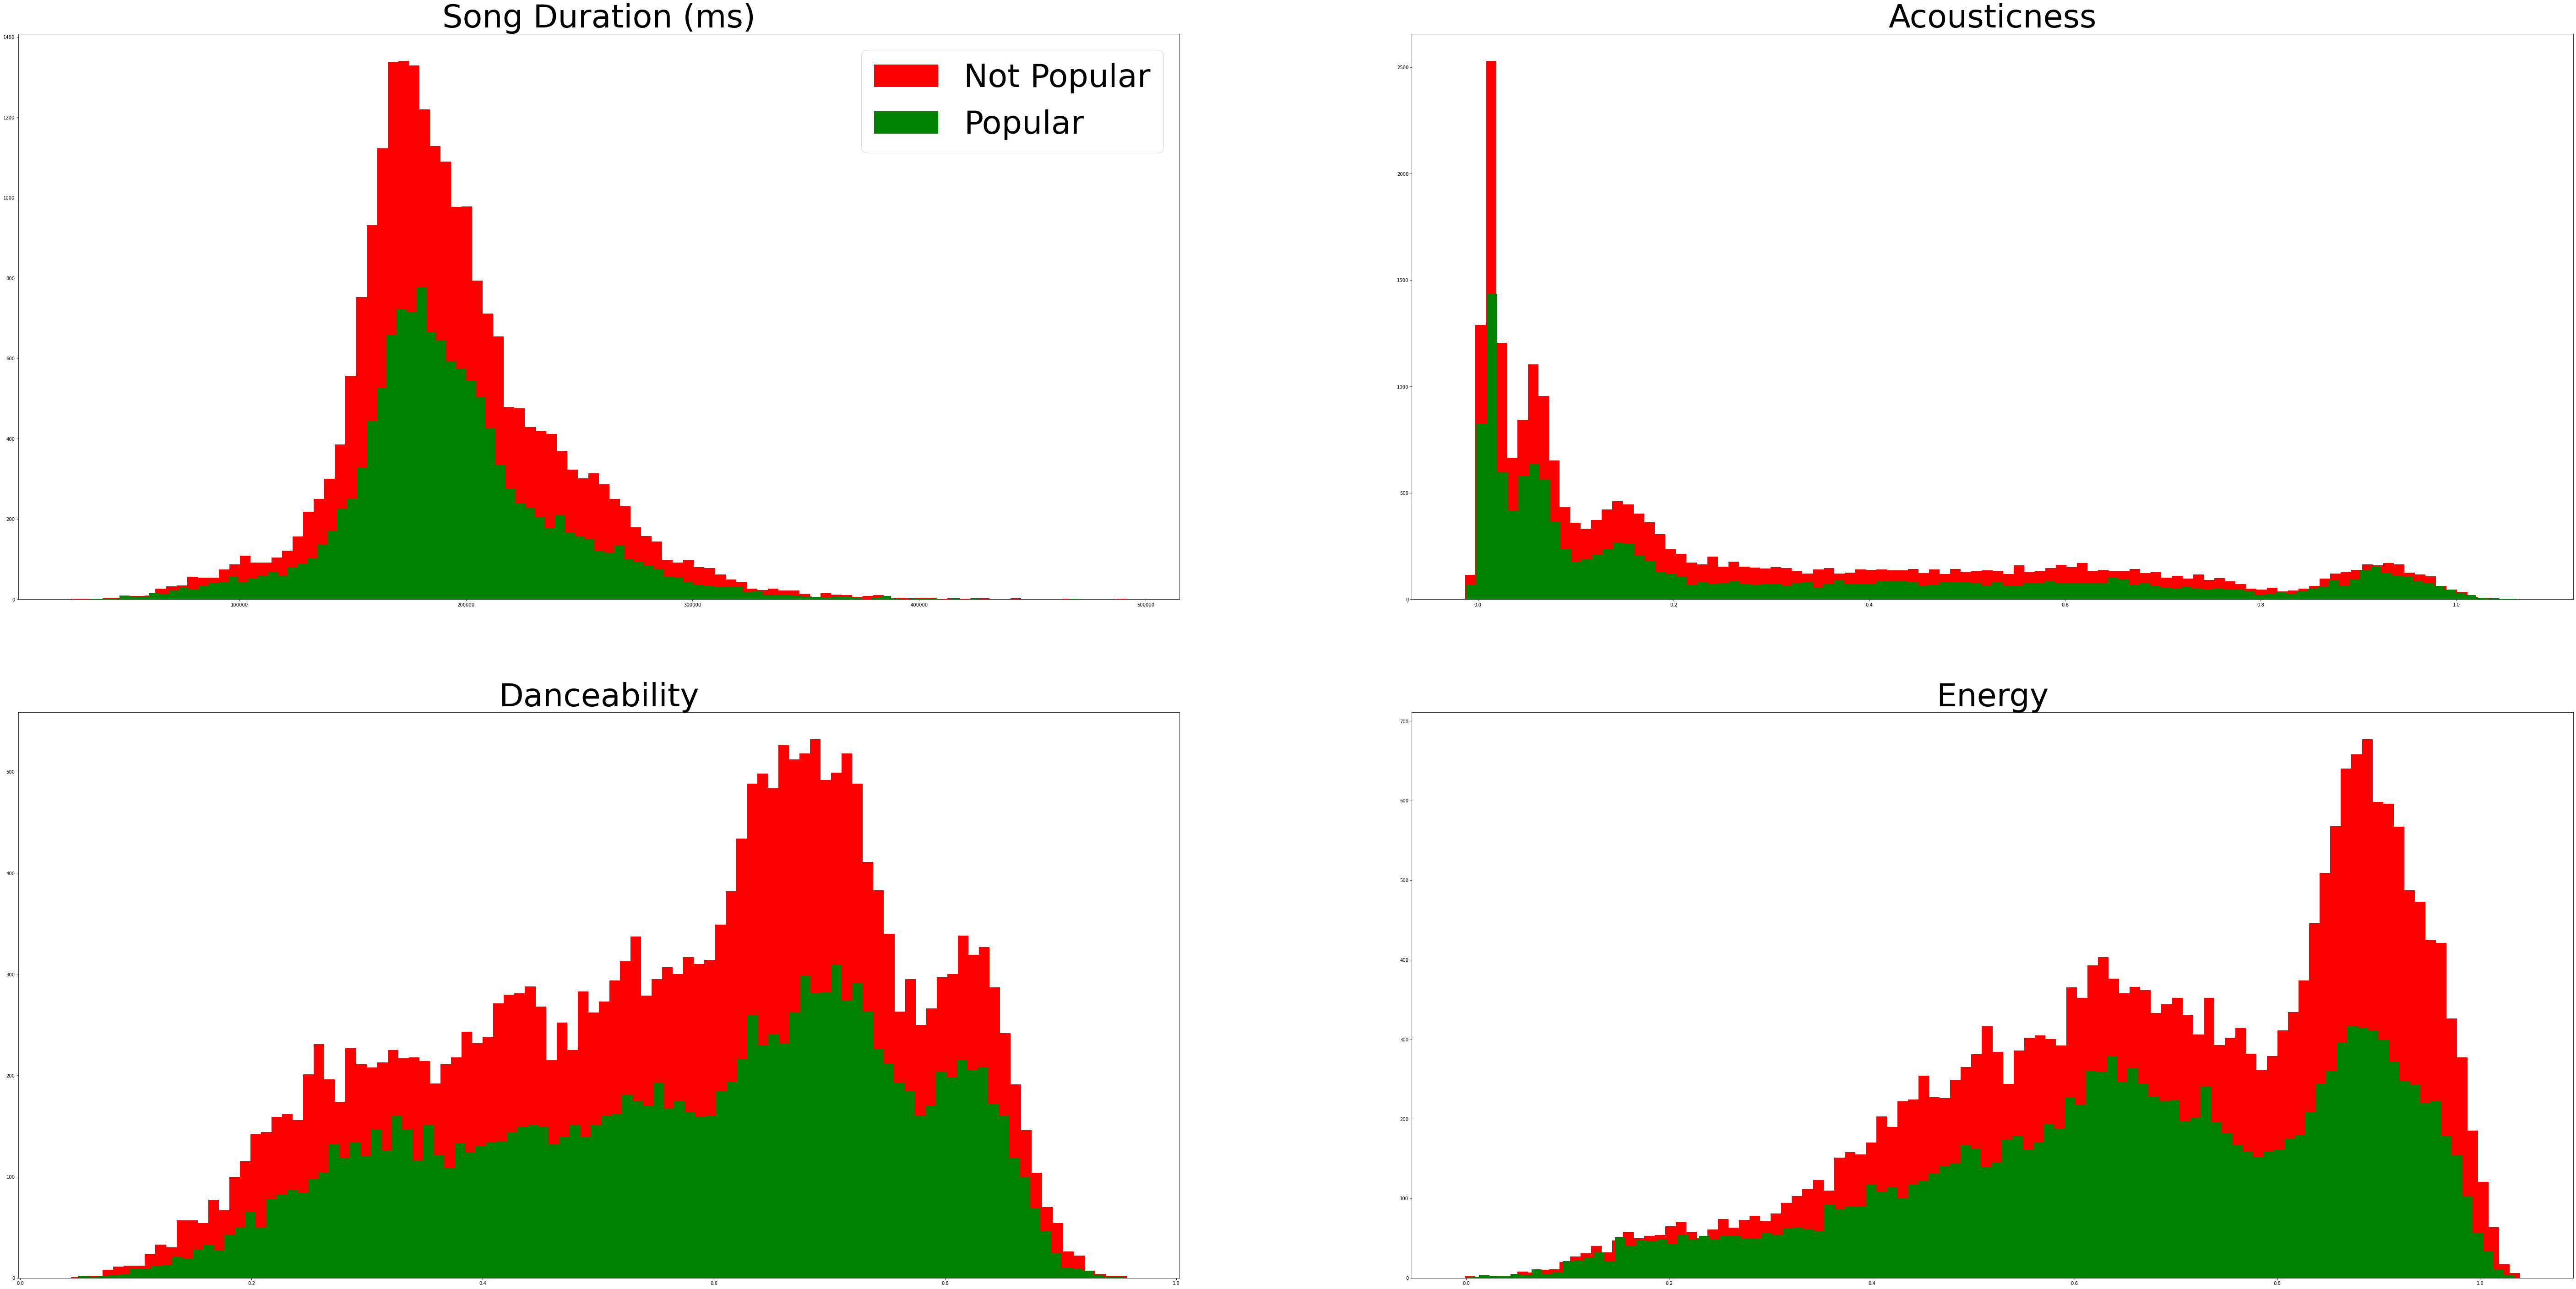

In [16]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize =  (100,50))

axes[0 , 0].hist(train['song_duration_ms'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[0 , 0].hist(train['song_duration_ms'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[0 , 0].set_title('Song Duration (ms)', fontsize = 70)
axes[0 , 0].legend(['Not Popular', 'Popular'], loc = 'upper right', fontsize = 70)

axes[0 , 1].hist(train['acousticness'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[0 , 1].hist(train['acousticness'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[0 , 1].set_title('Acousticness', fontsize = 70)

axes[1 , 0].hist(train['danceability'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[1 , 0].hist(train['danceability'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[1 , 0].set_title('Danceability', fontsize = 70)

axes[1 , 1].hist(train['energy'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[1 , 1].hist(train['energy'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[1 , 1].set_title('Energy', fontsize = 70)

plt.plot()

[]

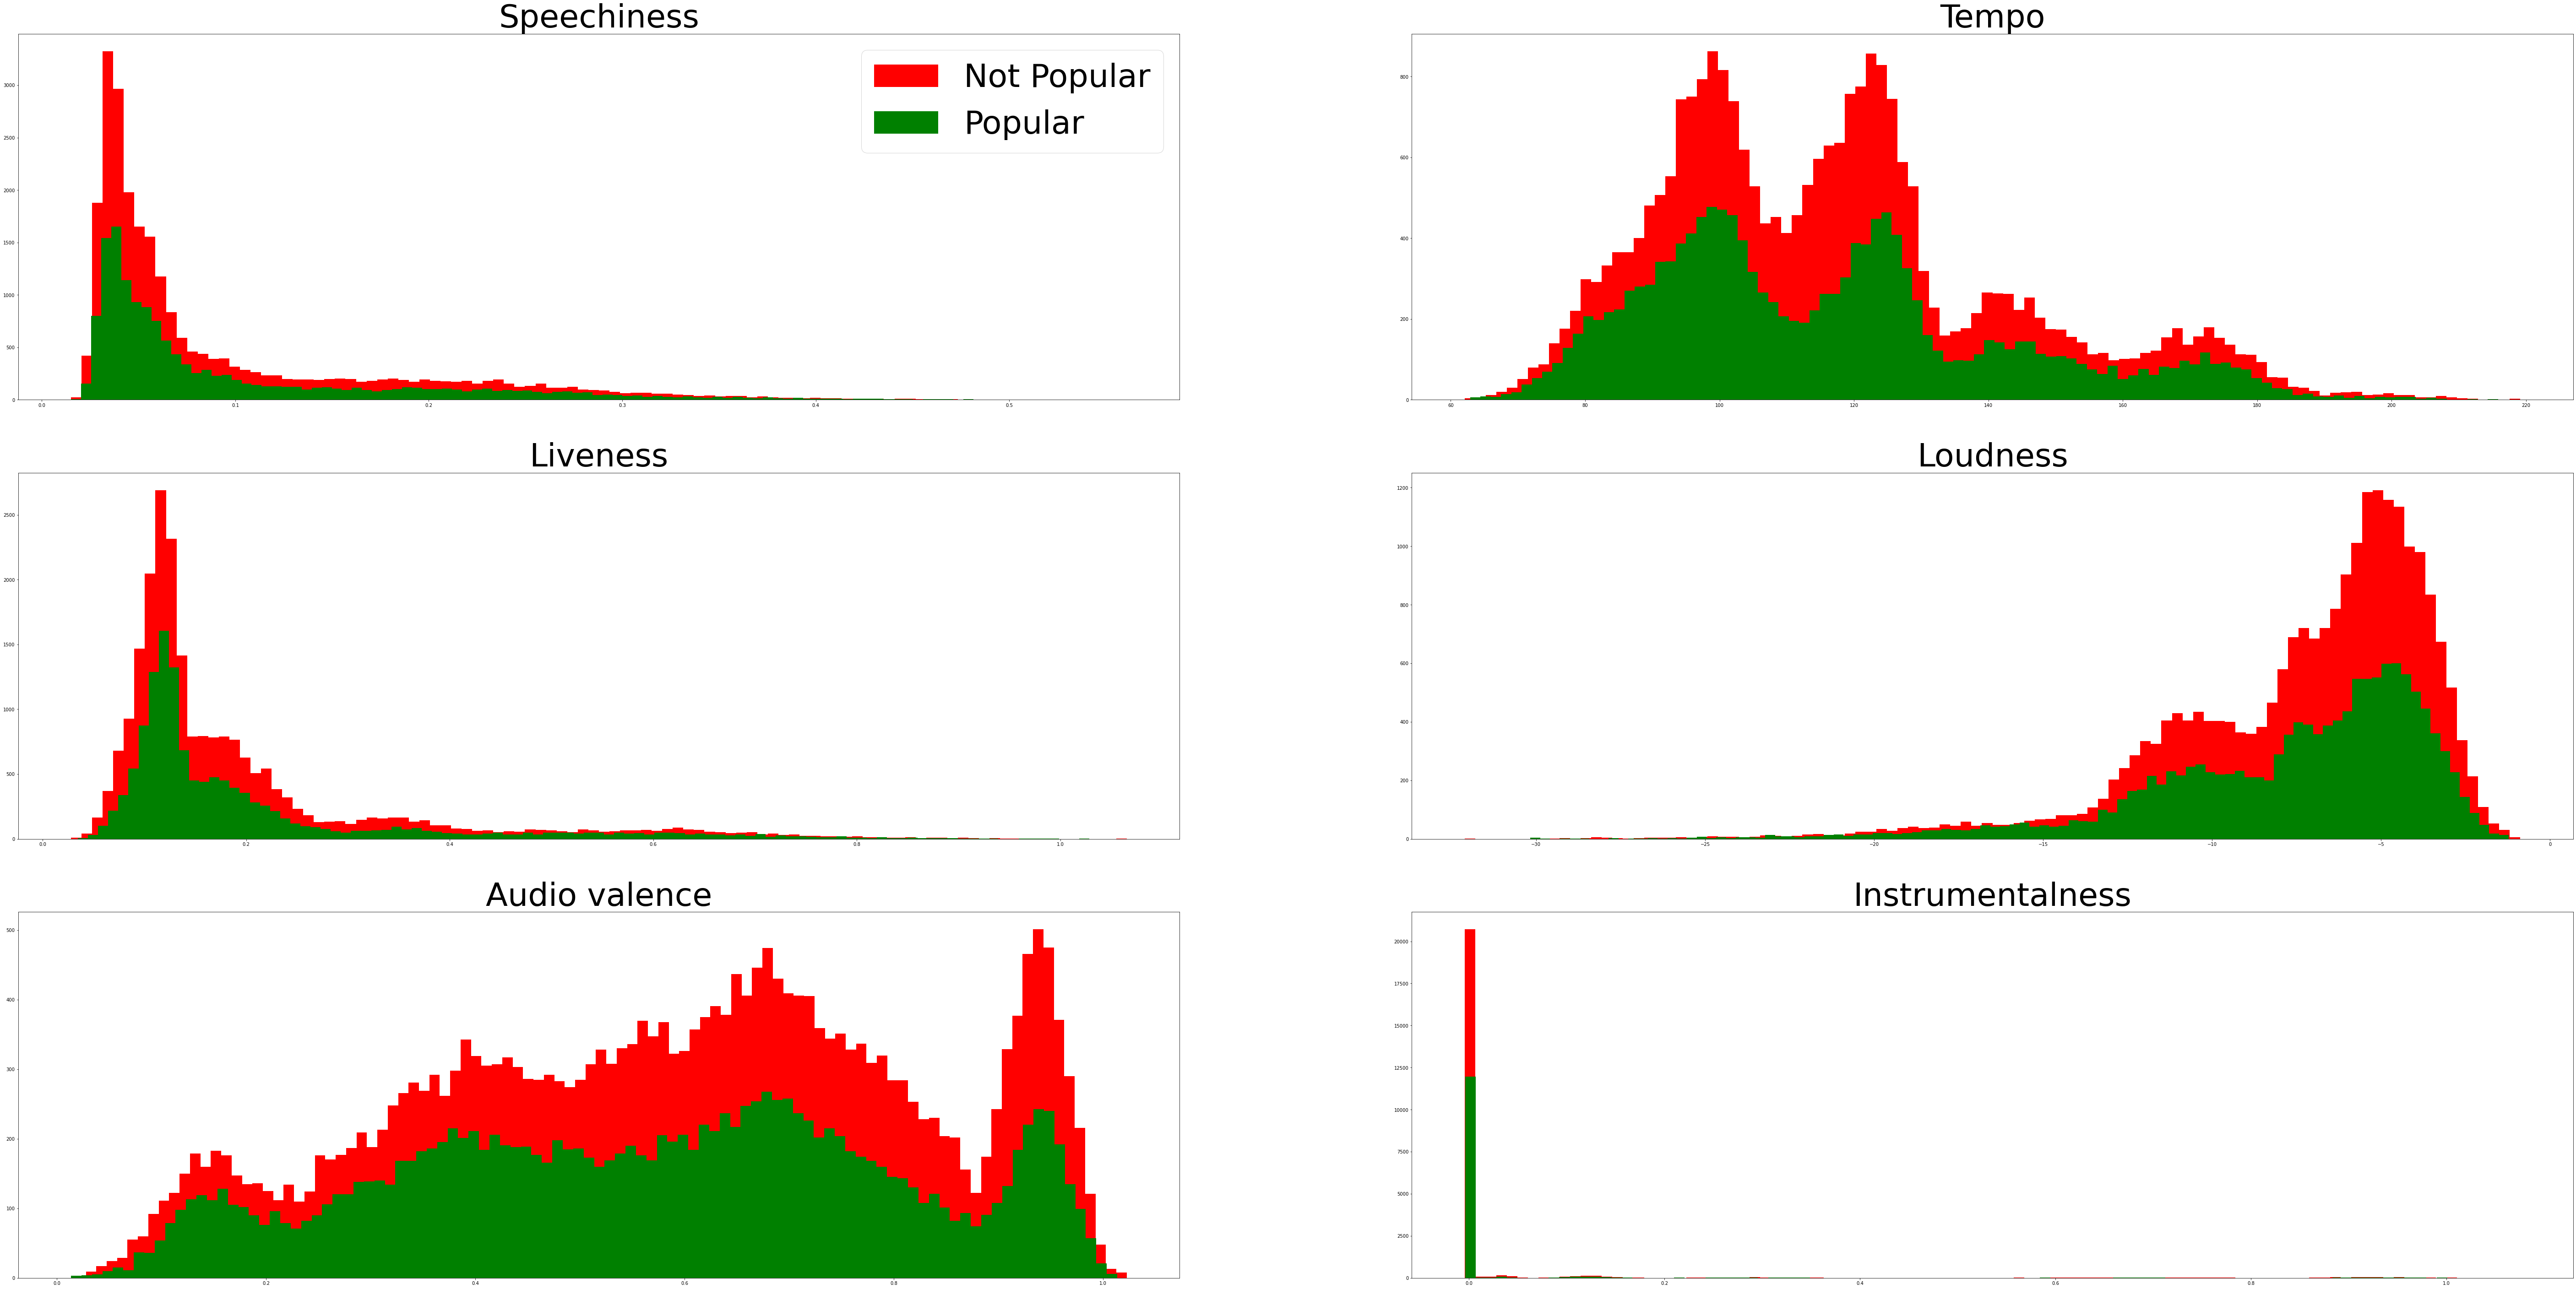

In [17]:
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize =  (100,50))

axes[0 , 0].hist(train['speechiness'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[0 , 0].hist(train['speechiness'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[0 , 0].set_title('Speechiness', fontsize = 70)
axes[0 , 0].legend(['Not Popular', 'Popular'], loc = 'upper right', fontsize = 70)

axes[0 , 1].hist(train['tempo'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[0 , 1].hist(train['tempo'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[0 , 1].set_title('Tempo', fontsize = 70)

axes[1 , 0].hist(train['liveness'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[1 , 0].hist(train['liveness'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[1 , 0].set_title('Liveness', fontsize = 70)

axes[1 , 1].hist(train['loudness'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[1 , 1].hist(train['loudness'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[1 , 1].set_title('Loudness', fontsize = 70)

axes[2 , 0].hist(train['audio_valence'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[2 , 0].hist(train['audio_valence'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[2 , 0].set_title('Audio valence', fontsize = 70)

axes[2 , 1].hist(train['instrumentalness'][train['song_popularity'].eq(0)], color = 'red', bins = 100)
axes[2 , 1].hist(train['instrumentalness'][train['song_popularity'].eq(1)], color = 'green', bins = 100)
axes[2 , 1].set_title('Instrumentalness', fontsize = 70)

plt.plot()

### Obsevation

The song duration feature seems to be the only normal distributed feature, with other features either heavily skewed of having weird distribution.

**Skewed Features** : Acousticness, Speechiness, Instrumentalness and Liveness.

**Weird Distribution Feature** : Danceability, Energy, Tempo, Loudness and Audio valence.

The plots also shows that the data distribution of popular songs based on the different features, isn't much different from unpopular songs. This means it will be a little bit tasky to correctly classify the songs.

## Ugh!!

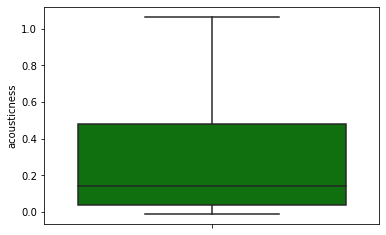

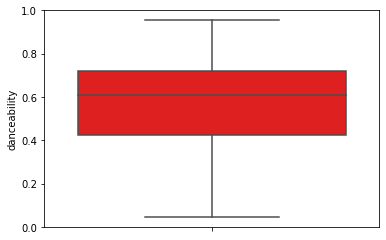

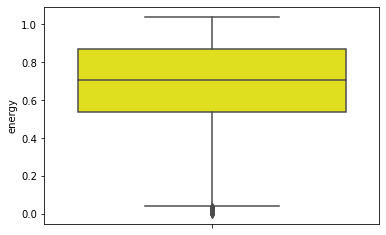

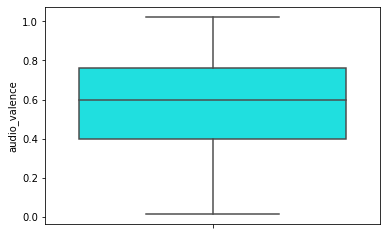

In [18]:
for (feat, col) in [('acousticness','green'), ('danceability','red'), ('energy', 'yellow'), ('audio_valence','cyan')]:
    plt.figure()
    sns.boxplot(y = train[feat], color = col)

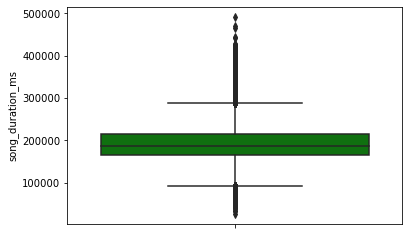

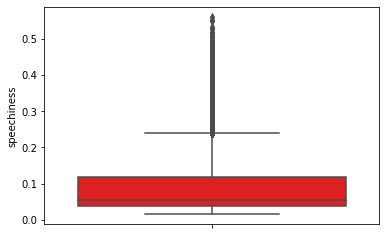

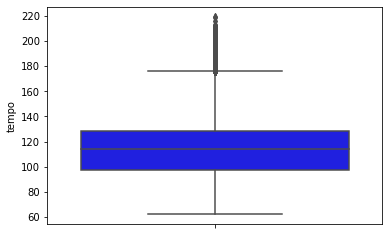

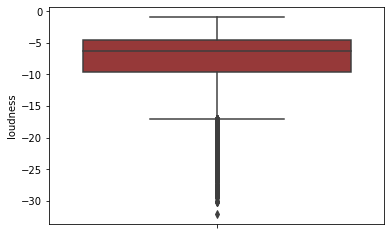

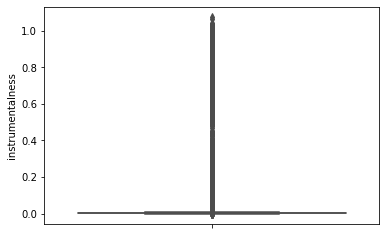

In [19]:
for (feat, col) in [('song_duration_ms','green'), ('speechiness','red'), ('tempo', 'blue'),('loudness','brown'),('instrumentalness','cyan')]:
    plt.figure()
    sns.boxplot(y = train[feat], color = col)

### Observation

The plots show that some of the features has outliers, this might be an issue while training a model.

### Categorical Plot

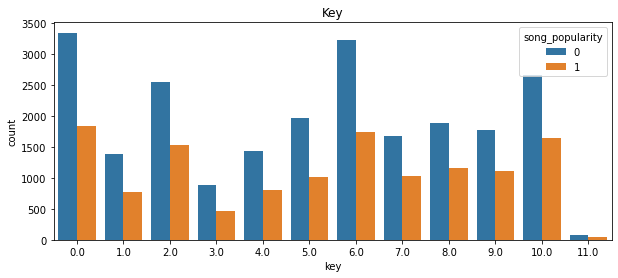

In [20]:
plt.figure(figsize = (10,4))
sns.countplot(train['key'], hue = train['song_popularity'])
plt.title('Key')
plt.show()

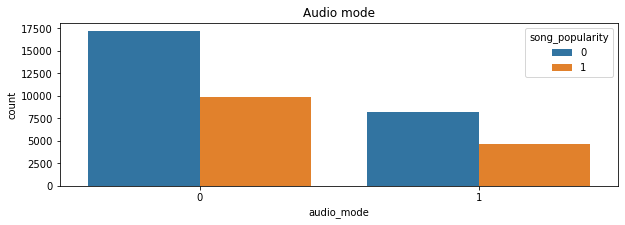

In [21]:
plt.figure(figsize = (10,3))
sns.countplot(train['audio_mode'], hue = train['song_popularity'])
plt.title('Audio mode')
plt.show()

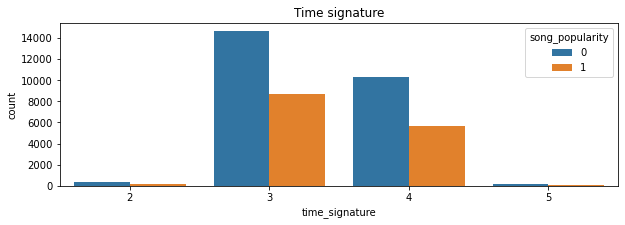

In [22]:
plt.figure(figsize = (10,3))
sns.countplot(train['time_signature'], hue = train['song_popularity'])
plt.title('Time signature')
plt.show()

## Multivariate Plot

#### Scatter plot

<Figure size 1440x360 with 0 Axes>

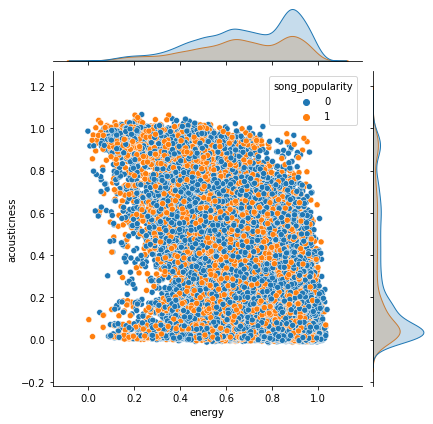

<Figure size 1440x360 with 0 Axes>

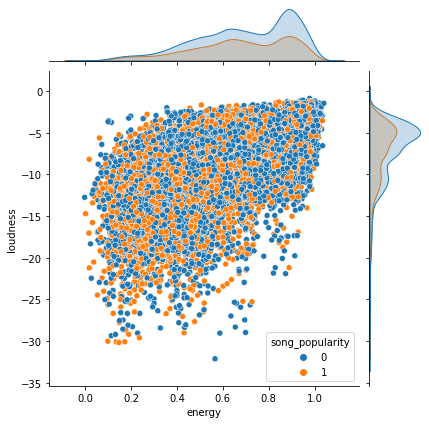

In [23]:
c = ['acousticness','loudness']
for x in c:
    plt.figure(figsize = (20,5))
    sns.jointplot(x = train['energy'], y = train[x], hue = train['song_popularity'] )

### Correlation plot

[]

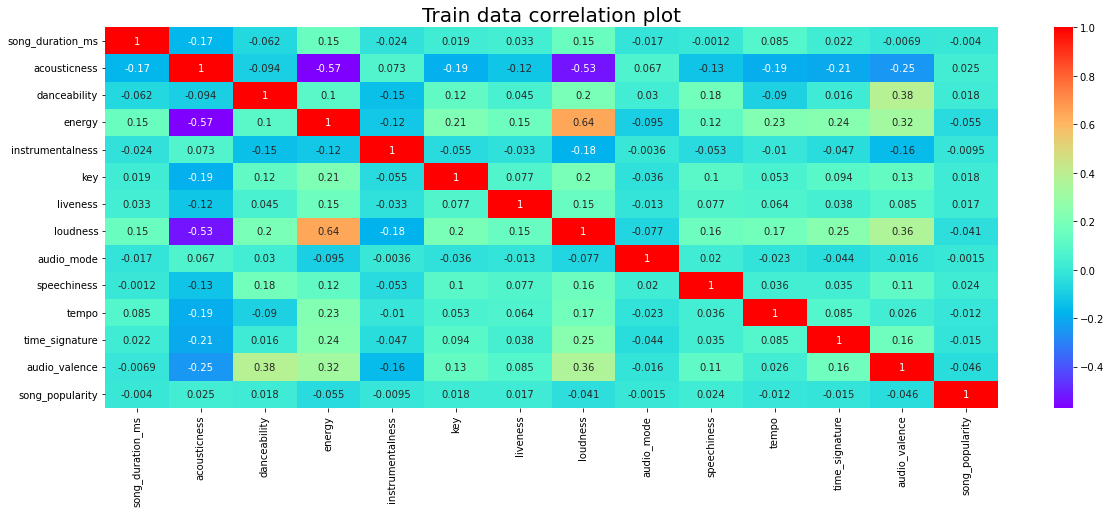

In [24]:
plt.figure(figsize = (20, 7))
sns.heatmap(train.corr(), cmap = 'rainbow', annot = True)
plt.title('Train data correlation plot', fontsize = 20)
plt.plot()

### Observation

The energy feature has a correlation of -0.570177 with the acousticeness feature

The energy feature has a correlation of 0.643931 with the loudness feature

The loudness feature has a correlation of -0.532724 with the acousticeness feature

### It seems we know a little about the data

### Let's start modelling